# Sentiment analysis

## Importo las librerias necesarias

In [1]:
import pandas as pd

#NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

#TextBlob
from textblob import TextBlob

import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

from pymongo import MongoClient

## Importo la colección Quotes guardado en .csv

In [2]:
"http://127.0.0.1:5000/phrase"

'http://127.0.0.1:5000/phrase'

In [3]:
df = pd.read_csv("data/quotes.csv")
df.head()

,Characters,Phrase,Movie,Year
0,Harry Potter,"I’ll be in my bedroom, making no noise and pre...",Harry Potter and the Chamber of Secrets,2002
1,Harry Potter,I solemnly swear I am up to no good.,Harry Potter and the Prisoner of Azkaban,2004
2,Harry Potter,Mischief Managed!,Harry Potter and the Prisoner of Azkaban,2004
3,Harry Potter,"There is no need to call me ‘sir,’ Professor.",Harry Potter and the Half-Blood Prince,2009
4,Harry Potter,"I can, you know, do math and stuff.",Harry Potter and the Philosopher's Stone,2001


## Compruebo cuales son las "Stopwords"
Las palabras (en mi caso, en inglés),  que no aportan significado a una frase. Se pueden ignorar sin afectar al significado de la frase. 

In [4]:
nltk.download('stopwords') #stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xabier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{"isn't", 'an', 'and', 'will', 'other', 'up', 'each', 'those', 'no', 'd', 'hasn', 'during', 'our', 'be', 'through', 'myself', 'am', 'they', 'so', 're', 've', 'on', 'which', 'at', 'him', 'ain', 'been', 'its', 'there', 'here', 'for', 'his', 'did', 'down', 'but', 'her', "don't", 'yourself', 'to', 'were', "mustn't", "shan't", "you'd", "weren't", 'isn', 'should', 'can', 'while', 'your', 'that', 'had', "needn't", "should've", 'being', 'then', "you're", 'needn', 'off', 'me', 'themselves', 'about', 'any', 'my', 'couldn', 'shan', 'in', 'into', 'are', 'just', 'if', 'yours', 'why', "it's", 'mustn', "hasn't", 'by', 'nor', "couldn't", "won't", 'whom', 'where', 'too', "didn't", "haven't", 'with', 'all', "you'll", 'doesn', 'was', 's', 'y', 'ourselves', 'before', 'after', 'wouldn', 'does', 'do', 'she', 'most', 'a', 'doing', 'from', 'same', 'himself', "hadn't", 'out', 'their', 'above', 't', 'them', 'not', 'both', 'further', "mightn't", 'wasn', "shouldn't", 'only', 'against', 'over', 'who', 'such', 'aga

In [6]:
blob = TextBlob(df["Phrase"][0])
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

# Textblob

- La librería TextBlob se usa para procesar datos de texto. Se obtiene una métrica de polaridad y subjetividad. 
    - La polaridad es el sentimiento mismo, que va de -1 a +1. 
    - La subjetividad es una medida del sentimiento siendo objetivo a subjetivo, y va de 0 a 1. 

Sintáxis: TextBlob(the_string).sentiment
    

    Args: string
    Returns: polarity & subjectivity

## Ejemplos de frases de los personajes

In [7]:
phrase0 = "I love you" #test
phrase1 = "I solemnly swear I am up to no good." #Harry Potter
phrase2 = "Fear of a name only increases fear of the thing itself." #Hermione Gringer
phrase3 = "Don’t let the muggles get you down." #Ron Weasley
phrase4 = "We are only as strong as we are united, as weak as we are divided." #Albus Dumbledore
phrase5 = "We teachers are rather good at magic, you know." #Minerva McGonagall
phrase6 = "Clearly fame isn't everything, is it, Mr. Potter?." #Severus Snape
phrase7 = "Dry Up Dursley, You Big Prune." #Rubeus Hagrid
phrase8 = "This class is ridiculous" #Draco Malfoy
phrase9 = "Bad Dobby! Bad Dobby!" #Dobby
phrase10 = "Don't you turn your back on me, Harry Potter! I want you to look at me when I kill you! I want to see the light leave your eyes!" #Voldemort

In [8]:
blob = TextBlob(phrase0)
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [9]:
blob = TextBlob(phrase1)
blob.sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

In [10]:
blob = TextBlob(phrase2)
blob.sentiment

Sentiment(polarity=0.0, subjectivity=1.0)

In [11]:
blob = TextBlob(phrase3)
blob.sentiment

Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)

In [12]:
blob = TextBlob(phrase4)
blob.sentiment

Sentiment(polarity=0.01944444444444443, subjectivity=0.7861111111111111)

In [13]:
"We teachers are rather good at magic, you know." #Minerva McGonagall
blob = TextBlob(phrase5)
blob.sentiment

Sentiment(polarity=0.6, subjectivity=0.8)

In [14]:
blob = TextBlob(phrase6)
blob.sentiment

Sentiment(polarity=0.10000000000000002, subjectivity=0.3833333333333333)

In [15]:
blob = TextBlob(phrase7)
blob.sentiment

Sentiment(polarity=-0.033333333333333326, subjectivity=0.35)

In [16]:
blob = TextBlob(phrase8)
blob.sentiment

Sentiment(polarity=-0.3333333333333333, subjectivity=1.0)

In [17]:
"Bad Dobby! Bad Dobby!" #Dobby
blob = TextBlob(phrase9)
blob.sentiment

Sentiment(polarity=-0.8749999999999998, subjectivity=0.6666666666666666)

In [18]:
blob = TextBlob(phrase10)
blob.sentiment

Sentiment(polarity=0.25, subjectivity=0.35)

# NLTK (Natural Language Toolkit)
- Es un conjunto de bibliotecas y programas de Python para el procesamiento del lenguaje natural (PLN) simbólico y estadísticos.

Sintáxis:sia.polarity_scores(the_string)

        Args: string
        Returns: polarity

In [19]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/xabier/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
sia = SentimentIntensityAnalyzer()

In [21]:
test1 = "this is beautiful"

In [22]:
polarity = sia.polarity_scores(test1)
polarity

{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

In [23]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [24]:
sentimentAnalysis(test1)

0.5994

## Aplico la función de sentimentAnalysis en el Dataframe

In [25]:
df['sentiment_compound'] = df.Phrase.apply(sentimentAnalysis)
df[:15]

,Characters,Phrase,Movie,Year,sentiment_compound
0,Harry Potter,"I’ll be in my bedroom, making no noise and pre...",Harry Potter and the Chamber of Secrets,2002,-0.2023
1,Harry Potter,I solemnly swear I am up to no good.,Harry Potter and the Prisoner of Azkaban,2004,0.3182
2,Harry Potter,Mischief Managed!,Harry Potter and the Prisoner of Azkaban,2004,-0.4199
3,Harry Potter,"There is no need to call me ‘sir,’ Professor.",Harry Potter and the Half-Blood Prince,2009,-0.2960
4,Harry Potter,"I can, you know, do math and stuff.",Harry Potter and the Philosopher's Stone,2001,0.0000
5,Harry Potter,Are you insane? Of course I want to leave the ...,Harry Potter and the Prisoner of Azkaban,2004,-0.5318
6,Harry Potter,"Yeah, Quirrell was a great teacher. There was ...",Harry Potter and the Order of the Phoenix,2007,0.7644
7,Harry Potter,"I know some things,’ he said. ‘I can, you know...",Harry Potter and the Philosopher's Stone,2001,0.0000
8,Albus Dumbledore,It does not do to dwell on dreams and forget t...,Harry Potter and the Philosopher's Stone,2001,0.1103
9,Albus Dumbledore,Fear of a name increases fear of the thing its...,Harry Potter and the Philosopher's Stone,2001,-0.7506


In [26]:
df.Characters.value_counts()

Harry Potter          8
Hermione Granger      8
Ron Weasley           8
Albus Dumbledore      8
Severus Snape         5
Rubeus Hagrid         3
Voldemort             3
Minerva McGonagall    3
Dobby                 3
Draco Malfoy          3
Name: Characters, dtype: int64

In [27]:
resumen = df.groupby(['Characters'])['sentiment_compound'].mean().sort_values()
resumen

Characters
Voldemort            -0.711400
Draco Malfoy         -0.146800
Albus Dumbledore     -0.128875
Dobby                -0.112567
Hermione Granger     -0.063000
Harry Potter         -0.045925
Rubeus Hagrid         0.000000
Severus Snape         0.037380
Ron Weasley           0.077900
Minerva McGonagall    0.146800
Name: sentiment_compound, dtype: float64

### Conclusión 1:

- Voldemort, es el principal antagonista de la saga Harry Potter y los resultados demuestran que es con 
   una media de -0.711400, el que tiene la polaridad más negativa.
- Minerva McGonagall, en cambio, según la muestra, es la que con una media de 0.146800, la que tiene más polaridad
   positiva.
    


<AxesSubplot:xlabel='Characters'>

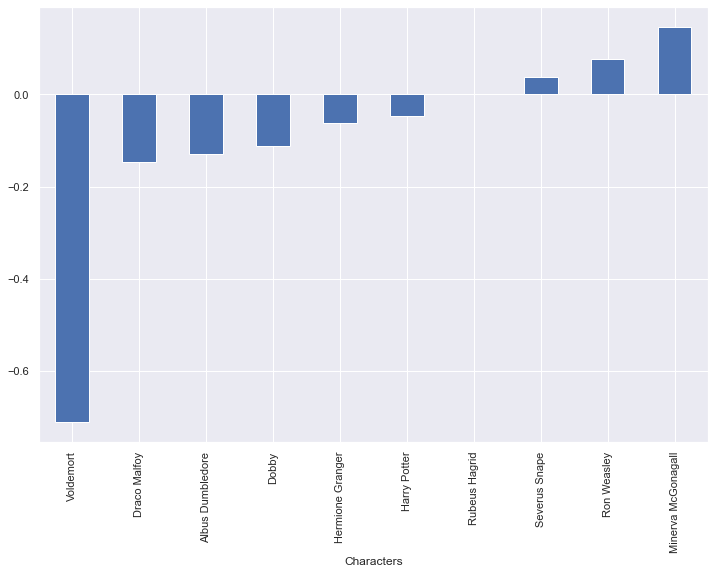

In [28]:
sns.set(rc={'figure.figsize':(12,8)})
resumen.plot(kind="bar")

## Voy a analizar a los 3 principales protagonistas
    - Harry Potter
    - Hermione Granger
    - Ron Weasley

### Conecto con mongo y a través de queries obtengo los datos de cada uno de ellos.

In [29]:
client = MongoClient("mongodb://localhost/harrypotter")
db = client.get_database()
client.harrypotter
sentiment = client.harrypotter.sentiment

In [30]:
filtro = {"Characters": {'$eq': "Harry Potter"}}
proyecto =  {'_id': 0}
result = list(db["sentiment"].find(filtro, proyecto))
result

[{'Characters': 'Harry Potter',
  'Phrase': 'I’ll be in my bedroom, making no noise and pretending I’m not there.',
  'Movie': 'Harry Potter and the Chamber of Secrets',
  'Year': '2002'},
 {'Characters': 'Harry Potter',
  'Phrase': 'I solemnly swear I am up to no good.',
  'Movie': 'Harry Potter and the Prisoner of Azkaban',
  'Year': '2004'},
 {'Characters': 'Harry Potter',
  'Phrase': 'Mischief Managed!',
  'Movie': 'Harry Potter and the Prisoner of Azkaban',
  'Year': '2004'},
 {'Characters': 'Harry Potter',
  'Phrase': 'There is no need to call me ‘sir,’ Professor.',
  'Movie': 'Harry Potter and the Half-Blood Prince',
  'Year': '2009'},
 {'Characters': 'Harry Potter',
  'Phrase': 'I can, you know, do math and stuff.',
  'Movie': "Harry Potter and the Philosopher's Stone",
  'Year': '2001'},
 {'Characters': 'Harry Potter',
  'Phrase': 'Are you insane? Of course I want to leave the Dursleys! Have you got a house? When can I move in?',
  'Movie': 'Harry Potter and the Prisoner of Az

In [31]:
hp = result

### Creo un Dataframe con los datos de Harry Potter

In [32]:
df1 = pd.DataFrame(hp)
df1

,Characters,Phrase,Movie,Year
0,Harry Potter,"I’ll be in my bedroom, making no noise and pre...",Harry Potter and the Chamber of Secrets,2002
1,Harry Potter,I solemnly swear I am up to no good.,Harry Potter and the Prisoner of Azkaban,2004
2,Harry Potter,Mischief Managed!,Harry Potter and the Prisoner of Azkaban,2004
3,Harry Potter,"There is no need to call me ‘sir,’ Professor.",Harry Potter and the Half-Blood Prince,2009
4,Harry Potter,"I can, you know, do math and stuff.",Harry Potter and the Philosopher's Stone,2001
5,Harry Potter,Are you insane? Of course I want to leave the ...,Harry Potter and the Prisoner of Azkaban,2004
6,Harry Potter,"Yeah, Quirrell was a great teacher. There was ...",Harry Potter and the Order of the Phoenix,2007
7,Harry Potter,"I know some things,’ he said. ‘I can, you know...",Harry Potter and the Philosopher's Stone,2001


In [33]:
filtro = {"Characters": {'$eq': "Hermione Granger"}}
proyecto =  {'_id': 0}
result2 = list(db["sentiment"].find(filtro, proyecto))
result2

[{'Characters': 'Hermione Granger',
  'Phrase': 'Just because it’s taken you three years to notice, Ron, doesn’t mean no one else has spotted I’m a girl!',
  'Movie': 'Harry Potter and the Goblet of Fire',
  'Year': '2005'},
 {'Characters': 'Hermione Granger',
  'Phrase': 'Dumbledore says people find it far easier to forgive others for being wrong than being right.',
  'Movie': 'Harry Potter and the Half-Blood Prince',
  'Year': '2009'},
 {'Characters': 'Hermione Granger',
  'Phrase': 'Who cares? I mean, It´s sort of exciting, isn´t it, breaking the rules.',
  'Movie': 'Harry Potter and the Order of the Phoenix',
  'Year': '2007'},
 {'Characters': 'Hermione Granger',
  'Phrase': 'Excuse me, I have to go vomit.',
  'Movie': 'Harry Potter and the Half-Blood Prince',
  'Year': '2009'},
 {'Characters': 'Hermione Granger',
  'Phrase': 'I hope you’re pleased with yourselves. We could all have been killed – or worse, expelled. Now if you don’t mind, I’m going to bed.',
  'Movie': "Harry Potte

In [34]:
hg = result2

### Creo otro Dataframe con los datos de Hermione Granger

In [35]:
df2 = pd.DataFrame(hg)
df2

,Characters,Phrase,Movie,Year
0,Hermione Granger,Just because it’s taken you three years to not...,Harry Potter and the Goblet of Fire,2005
1,Hermione Granger,Dumbledore says people find it far easier to f...,Harry Potter and the Half-Blood Prince,2009
2,Hermione Granger,"Who cares? I mean, It´s sort of exciting, isn´...",Harry Potter and the Order of the Phoenix,2007
3,Hermione Granger,"Excuse me, I have to go vomit.",Harry Potter and the Half-Blood Prince,2009
4,Hermione Granger,I hope you’re pleased with yourselves. We coul...,Harry Potter and the Philosopher's Stone,2001
5,Hermione Granger,"Twitchy little ferret, aren’t you, Malfoy?",Harry Potter and the Goblet of Fire,2005
6,Hermione Granger,Fear of a name only increases fear of the thin...,Harry Potter and the Chamber of Secrets,2002
7,Hermione Granger,Just because you have the emotional range of a...,Harry Potter and the Order of the Phoenix,2007


In [36]:
filtro = {"Characters": {'$eq': "Ron Weasley"}}
proyecto =  {'_id': 0}
result3 = list(db["sentiment"].find(filtro, proyecto))
result3

[{'Characters': 'Ron Weasley',
  'Phrase': "You're a little scary sometimes, you know that? Brilliant ... but scary.",
  'Movie': "Harry Potter and the Philosopher's Stone",
  'Year': '2001'},
 {'Characters': 'Ron Weasley',
  'Phrase': 'When in doubt, go to the library.',
  'Movie': 'Harry Potter and the Chamber of Secrets',
  'Year': '2002'},
 {'Characters': 'Ron Weasley',
  'Phrase': 'Don’t let the muggles get you down.',
  'Movie': 'Harry Potter and the Prisoner of Azkaban',
  'Year': '2004'},
 {'Characters': 'Ron Weasley',
  'Phrase': 'Accio Brain!',
  'Movie': 'Harry Potter and the Order of the Phoenix',
  'Year': '2007'},
 {'Characters': 'Ron Weasley',
  'Phrase': "It's Beautiful, Isn't It? The Moon.",
  'Movie': 'Harry Potter and the Half-Blood Prince',
  'Year': '2009'},
 {'Characters': 'Ron Weasley',
  'Phrase': "You're Gonna Suffer, But You're Gonna ... Be Happy About It.",
  'Movie': 'Harry Potter and the Prisoner of Azkaban',
  'Year': '2004'},
 {'Characters': 'Ron Weasley'

In [37]:
rw = result3

### Creo el último Dataframe con los datos de Ron Weasley

In [38]:
df3 = pd.DataFrame(rw)
df3

,Characters,Phrase,Movie,Year
0,Ron Weasley,"You're a little scary sometimes, you know that...",Harry Potter and the Philosopher's Stone,2001
1,Ron Weasley,"When in doubt, go to the library.",Harry Potter and the Chamber of Secrets,2002
2,Ron Weasley,Don’t let the muggles get you down.,Harry Potter and the Prisoner of Azkaban,2004
3,Ron Weasley,Accio Brain!,Harry Potter and the Order of the Phoenix,2007
4,Ron Weasley,"It's Beautiful, Isn't It? The Moon.",Harry Potter and the Half-Blood Prince,2009
5,Ron Weasley,"You're Gonna Suffer, But You're Gonna ... Be H...",Harry Potter and the Prisoner of Azkaban,2004
6,Ron Weasley,"Yeah, That's Me - Ron Weasley, Harry Potter's ...",Harry Potter and the Goblet of Fire,2005
7,Ron Weasley,I Look Like My Great-Aunt Tessie ... Smell Lik...,Harry Potter and the Goblet of Fire,2005


### Convierto los dataframes en uno principal

In [47]:
mains = pd.concat([df1, df2, df3], ignore_index=True)
mains

,Characters,Phrase,Movie,Year
0,Harry Potter,"I’ll be in my bedroom, making no noise and pre...",Harry Potter and the Chamber of Secrets,2002
1,Harry Potter,I solemnly swear I am up to no good.,Harry Potter and the Prisoner of Azkaban,2004
2,Harry Potter,Mischief Managed!,Harry Potter and the Prisoner of Azkaban,2004
3,Harry Potter,"There is no need to call me ‘sir,’ Professor.",Harry Potter and the Half-Blood Prince,2009
4,Harry Potter,"I can, you know, do math and stuff.",Harry Potter and the Philosopher's Stone,2001
5,Harry Potter,Are you insane? Of course I want to leave the ...,Harry Potter and the Prisoner of Azkaban,2004
6,Harry Potter,"Yeah, Quirrell was a great teacher. There was ...",Harry Potter and the Order of the Phoenix,2007
7,Harry Potter,"I know some things,’ he said. ‘I can, you know...",Harry Potter and the Philosopher's Stone,2001
8,Hermione Granger,Just because it’s taken you three years to not...,Harry Potter and the Goblet of Fire,2005
9,Hermione Granger,Dumbledore says people find it far easier to f...,Harry Potter and the Half-Blood Prince,2009


### Aplico la función de sentimentAnalysis

In [48]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [49]:
mains['sentiment_compound'] = mains.Phrase.apply(sentimentAnalysis)
mains.head()

,Characters,Phrase,Movie,Year,sentiment_compound
0,Harry Potter,"I’ll be in my bedroom, making no noise and pre...",Harry Potter and the Chamber of Secrets,2002,-0.2023
1,Harry Potter,I solemnly swear I am up to no good.,Harry Potter and the Prisoner of Azkaban,2004,0.3182
2,Harry Potter,Mischief Managed!,Harry Potter and the Prisoner of Azkaban,2004,-0.4199
3,Harry Potter,"There is no need to call me ‘sir,’ Professor.",Harry Potter and the Half-Blood Prince,2009,-0.2960
4,Harry Potter,"I can, you know, do math and stuff.",Harry Potter and the Philosopher's Stone,2001,0.0000


In [50]:
mains.Characters.value_counts()

Harry Potter        8
Hermione Granger    8
Ron Weasley         8
Name: Characters, dtype: int64

In [60]:
resumen2 = mains.groupby(['Characters'])['sentiment_compound'].mean().sort_values()
resumen2

Characters
Hermione Granger   -0.063000
Harry Potter       -0.045925
Ron Weasley         0.077900
Name: sentiment_compound, dtype: float64

### Conclusión 2:


- De los 3 protagonistas y según las frases analizadas;
    - Ron Weasley con una media de 0.077900 es el que más polaridad positiva tiene.
    - Hermione Granger y Harry Potter tienen polaridad negativa, siendo la media de Hermione -0.063000 y la de Harry -0.045925.
    


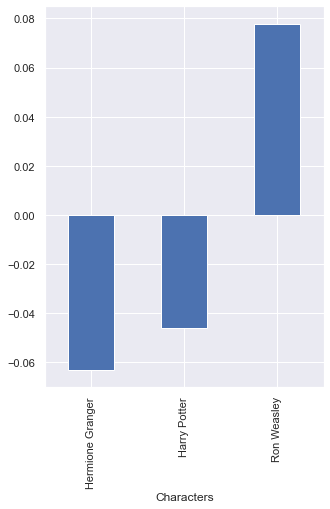

In [69]:
sns.set(rc={'figure.figsize':(5,7)})
resumen2.plot(kind="bar")
fig.savefig("mains.jpg")